schemat -> prawd gaussem
Optymalizacje:
+ zapamietujemy najlepszy wynik
+ kilka razy go wykonujemy
+ Tempreratura dazy do 0
+ nie polepsza sie drastcznie

#Zadanie 2 - minimalizacja energi potencjalnej, stan - maicerz binarna
energia potencjalna - kilka rodzajow sasiedztwa ( liczymy sume (lub inna funcke) czarncyh sasaidow przetestuj 5-10), mozna przesunac kilka na razz
+ interpretacja naszej fizyki GIFY ZAWSZE NA PLUS

+ rozne schematy wyzarzania

#Zadanie 3
Trudne planszee 52 najtrudniejsze plansze sudoku
trudny dobor hiperparametrow, moze byc trudno z wykresami
( na piatke)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def first_im(n, density):
    wanted = n*n*density
    light = []
    dark = []
    for x in range(n):
        for y in range(n):
            if len(dark) < wanted and random.choice([1,0]) == 1:
                dark.append((x,y))
            else:
                light.append((x,y))
    return dark, light


def annealing_img(n, density, fneighbour = [(1,1), (-1,-1), (-1,1), (1,-1)], iterations = 10**(4), temperature = lambda x: x*0.95):

    def point_energy(x,y,light, neighbours):
        e = 0
        for x1, y1 in neighbours:
            x_n = x + x1
            y_n = y + y1

            if (x,y) in light:
                e += 1

        return e


    def full_energy():
        full_e = 0
        for x in range(n):
            for y in range(n):
                full_e += point_energy(x,y, l, fneighbour)
        return full_e


    d, l = first_im(n, density)
    results = []


    energy = full_energy()
    results.append(energy)

    p = 1
    for _ in range(iterations):
        random.shuffle(d)
        random.shuffle(l)

        l.append(d.pop(0))
        d.append(l.pop(0))

        new_energy = full_energy()

        if new_energy < energy:
            energy = new_energy
            results.append(energy)
        elif random.random() < p:
            energy = new_energy
            results.append(energy)
        else:
            l.append(d.pop(-1))
            d.append(l.pop(-1))

        p = temperature(p)
    return d, results

In [48]:
def visualize_img(dark, n):
    t = [[1 if (x, y) in dark else 0 for y in range(n)] for x in range(n)]
    img = np.array(t).reshape(n,n)
    plt.imshow(img, cmap=plt.cm.gray)

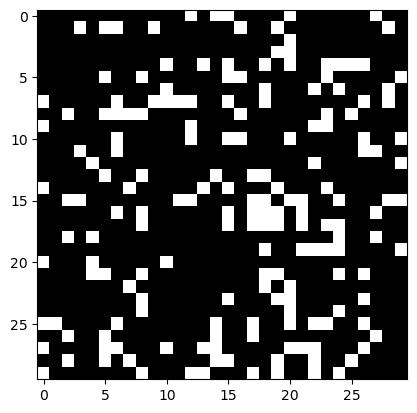

In [49]:
d, r = annealing_img(30,0.2)
visualize_img(d,30)